# Clustering Assignment

### Business Objectives




HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time.

 
They have been able to raise around $ 10 million from funding sources. They now need to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 
Therefore it is required to categorise the countries using some socio-economic and health factors that determine the overall development of the country, so that the countries on which the HELP International NGO needs to focus on the most can be suggested. 

### Steps:

1. Reading and understanding the data
1. Cleaning the data, EDA & Data Visualization (univariate analysis, bivariate analysis, etc)
1. Outlier Analysis
1. Preparing the Data for modelling
1. Modelling the data ( i. K-means and ii. Hierarchical clustering- both single and complete linkage )
1. Final analysis and Recommendation.

In [1]:
# Importing the required libraries & filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 

In [2]:
#changing the display options for rows and columns
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)
pd.set_option('display.width',200)

# Reading, Understanding and Visualizing the data

## Importing datasets

#### Reading the data in dataframe df

In [3]:
df = pd.read_csv("Country-data.csv")

## Data understanding

In [4]:
#checking the top 5 rows of the dataframe 
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
#checking the info for dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
#Checking the number of rows and columns in the dataframe
df.shape

(167, 10)

# Cleaning the data

## Checking for missing and duplicate values

In [7]:
#checking for any missing values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
#checking for any duplicate values
df.duplicated().sum()

0

**Observation:** 

No null values in any column, the datatypes of all the parameter columns are numeric.

The dataset does not contain any duplicate entries.

## Derived metrics

In [9]:
# The values of columns 'exports','health','imports' are given as a %age of GDP per capita
# Converting these values from %age to actual values 

df['exports'] = (df['exports'] * df['gdpp'])/100
df['health'] = (df['health'] * df['gdpp'])/100
df['imports'] = (df['imports'] * df['gdpp'])/100

In [10]:
#checking the final dataframe
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610,9.440,56.2,5.82,553
1,Albania,16.6,1145.20000,267.8950,1987.740000,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,1712.64000,185.9820,1400.440000,12900,16.100,76.5,2.89,4460
3,Angola,119.0,2199.19000,100.6050,1514.370000,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00000,735.6600,7185.800000,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,1946.70000,834.3000,1648.000000,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,669.76000,141.6800,1458.660000,6700,7.770,73.3,1.69,3220
7,Australia,4.8,10276.20000,4530.8700,10847.100000,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.70000,5159.0000,22418.200000,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,3171.12000,343.3920,1208.880000,16000,13.800,69.1,1.92,5840


# EDA & Data Visualization

## Univariate Analysis

### Distribution plots

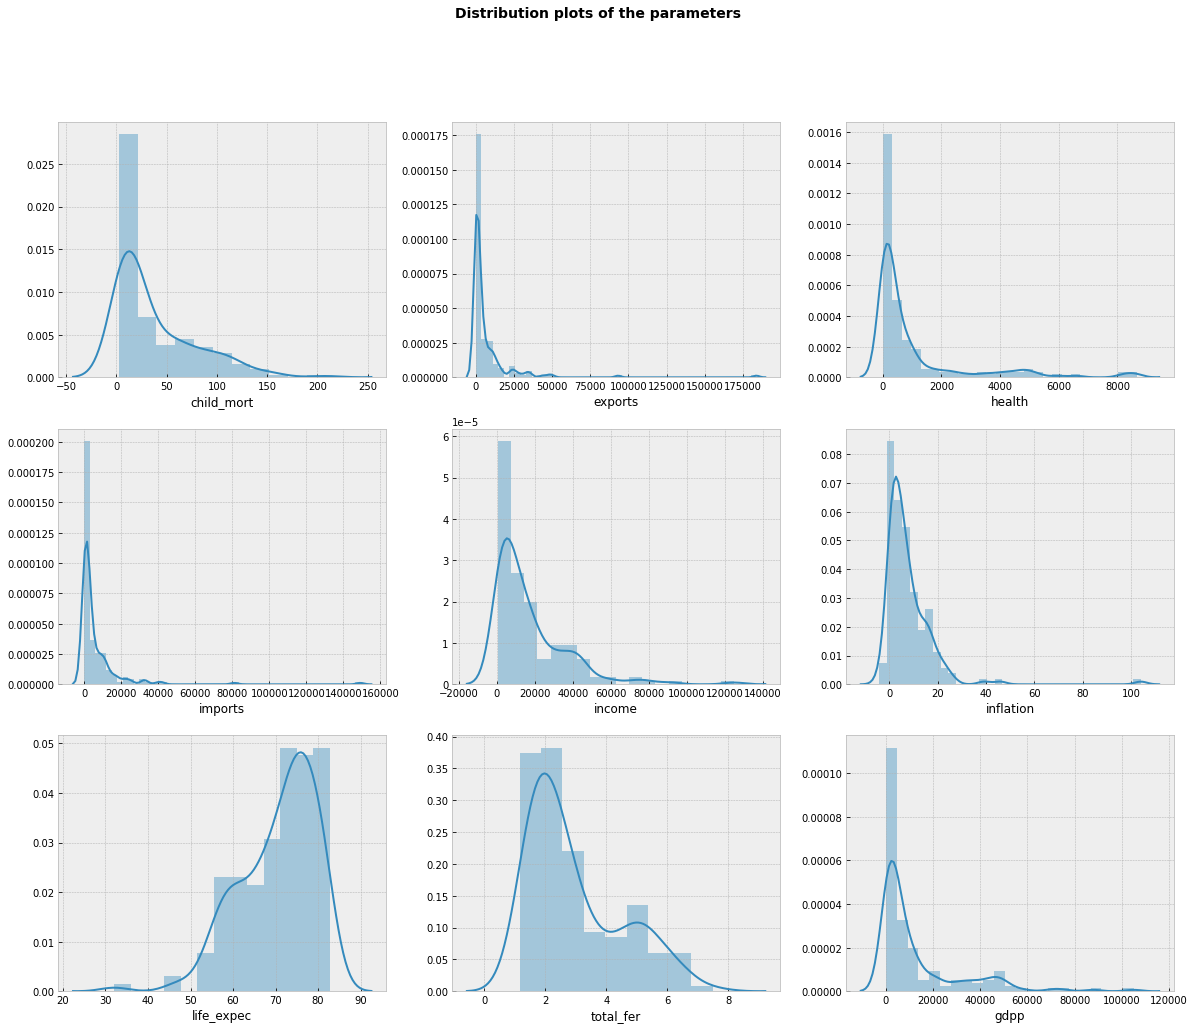

In [11]:
#Distribution  plots of all variables
plt.style.use('bmh')
plt.figure(figsize=(20,16))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(df[i[1]])
plt.suptitle("Distribution plots of the parameters", fontsize = 14, fontweight="bold")
plt.show();

## Checking for outlier values

In [12]:
#Statistical description of the dataframe
df.describe(percentiles=[0.05,0.25,0.5,0.75,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
child_mort,167.0,38.270060,40.328931,2.600000,3.46000,8.2500,19.300,62.10,116.000,153.4000,208.00
exports,167.0,7420.618847,17973.885795,1.076920,70.46880,447.1400,1777.440,7278.00,31385.100,64794.2600,183750.00
health,167.0,1056.733204,1801.408906,12.821200,26.71592,78.5355,321.886,976.94,4966.701,8410.3304,8663.60
imports,167.0,6588.352108,14710.810418,0.651092,169.28100,640.2150,2045.580,7719.60,24241.560,55371.3900,149100.00
income,167.0,17144.688623,19278.067698,609.000000,1213.00000,3355.0000,9960.000,22800.00,48290.000,84374.0000,125000.00
inflation,167.0,7.781832,10.570704,-4.210000,0.18340,1.8100,5.390,10.75,20.870,41.4780,104.00
life_expec,167.0,70.555689,8.893172,32.100000,55.78000,65.3000,73.100,76.80,81.400,82.3700,82.80
total_fer,167.0,2.947964,1.513848,1.150000,1.39000,1.7950,2.410,3.88,5.861,6.5636,7.49
gdpp,167.0,12964.155689,18328.704809,231.000000,465.90000,1330.0000,4660.000,14050.00,48610.000,79088.0000,105000.00


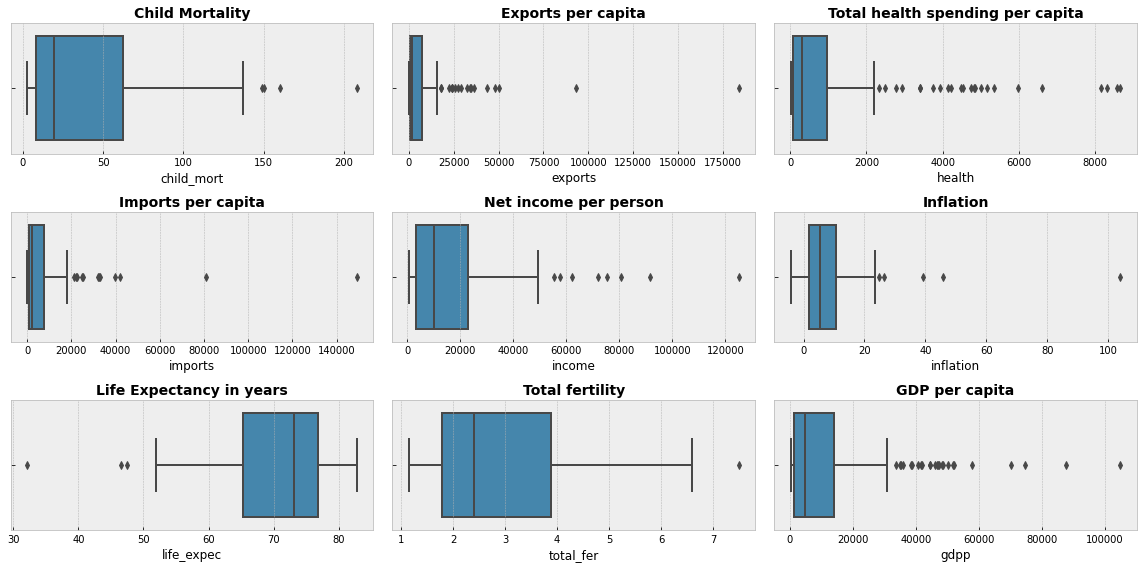

In [13]:
#Box plots of all variables
plt.figure(figsize=(16,8))

plt.subplot(3,3,1)
sns.boxplot(df["child_mort"])
plt.title("Child Mortality", fontsize = 14, fontweight="bold")

plt.subplot(3,3,2)
sns.boxplot(df['exports'])
plt.title("Exports per capita", fontsize = 14, fontweight="bold")

plt.subplot(3,3,3)
sns.boxplot(df["health"])
plt.title("Total health spending per capita", fontsize = 14, fontweight="bold")

plt.subplot(3,3,4)
sns.boxplot(df["imports"])
plt.title("Imports per capita", fontsize = 14, fontweight="bold")

plt.subplot(3,3,5)
sns.boxplot(df["income"])
plt.title("Net income per person", fontsize = 14, fontweight="bold")

plt.subplot(3,3,6)
sns.boxplot(df["inflation"])
plt.title("Inflation", fontsize = 14, fontweight="bold")

plt.subplot(3,3,7)
sns.boxplot(df["life_expec"])
plt.title("Life Expectancy in years", fontsize = 14, fontweight="bold")

plt.subplot(3,3,8)
sns.boxplot(df["total_fer"])
plt.title("Total fertility", fontsize = 14, fontweight="bold")

plt.subplot(3,3,9)
sns.boxplot(df["gdpp"])
plt.title("GDP per capita", fontsize = 14, fontweight="bold")

plt.tight_layout()
plt.show();

## Outlier Analysis

**Observations on Outliers:**

From the statistical summary table and the boxplots, we can observe the following regarding outliers:

1. All the columns have outlier values. 

1. For all columns except life_expec, the outliers are greater than the third (upper) quartile. 

1. For life_expec, the outliers are less than the first (lower) quartile. 

1. The number of outliers is fewer for life_expec and child_mort columns.

1. We have observed the outler values as part of our Outlier Analysis. Here we choose not to remove the outliers as the number of records is less and this will lead to loss of information important to the business needs. There are likely to be significant differences in the different parameters from the clusters of developed countries and underdeveloped countries, so the outlier values would be important for analysis.  Instead of removing them, we perform upper capping of the outliers which are greater than the third (upper) quartile at the 99th percentile value.

1. For child_mort, we will not cap the outliers in higher range for these columns, as these countries in the outlier regions are in dire need of aid and capping them will result in information loss. Similarly we will not cap the lower range outliers in life_expec columns as these countries with lower life expectancy will be our target countries.

In [14]:
#define a function to cap higher outlier values at 99th percentile

def outlier_capping(dataset, column_name):
    cap_value = dataset[column_name].quantile(0.99)
    dataset[column_name][dataset[column_name]>= cap_value] = cap_value

In [15]:
#Capping the outliers for the mentioned columns
outlier_capping(df, "imports")
outlier_capping(df, "exports")
outlier_capping(df, "inflation")
outlier_capping(df, "health")
outlier_capping(df, "total_fer")
outlier_capping(df, "income")
outlier_capping(df, "gdpp")

**Thus we have treated the upper outliers except for child mortality by capping them at the 99th percentile value. Lower outliers have not been treated.**

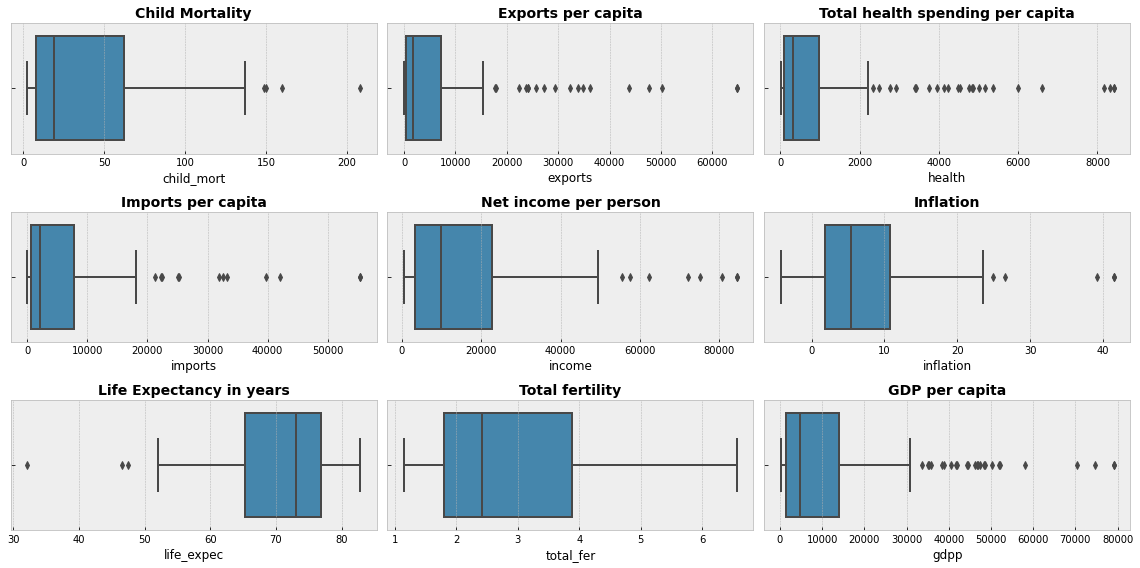

In [16]:
#Box plots after capping outliers

plt.figure(figsize=(16,8))
plt.style.use('bmh')

plt.subplot(3,3,1)
sns.boxplot(df["child_mort"])
plt.title("Child Mortality", fontsize = 14, fontweight="bold")

plt.subplot(3,3,2)
sns.boxplot(df['exports'])
plt.title("Exports per capita", fontsize = 14, fontweight="bold")

plt.subplot(3,3,3)
sns.boxplot(df["health"])
plt.title("Total health spending per capita", fontsize = 14, fontweight="bold")

plt.subplot(3,3,4)
sns.boxplot(df["imports"])
plt.title("Imports per capita", fontsize = 14, fontweight="bold")

plt.subplot(3,3,5)
sns.boxplot(df["income"])
plt.title("Net income per person", fontsize = 14, fontweight="bold")

plt.subplot(3,3,6)
sns.boxplot(df["inflation"])
plt.title("Inflation", fontsize = 14, fontweight="bold")

plt.subplot(3,3,7)
sns.boxplot(df["life_expec"])
plt.title("Life Expectancy in years", fontsize = 14, fontweight="bold")

plt.subplot(3,3,8)
sns.boxplot(df["total_fer"])
plt.title("Total fertility", fontsize = 14, fontweight="bold")

plt.subplot(3,3,9)
sns.boxplot(df["gdpp"])
plt.title("GDP per capita", fontsize = 14, fontweight="bold")

plt.tight_layout()
plt.show();

### Finding the top 10/ bottom 10 countries based on each of the given parameters.

As part of our univariate analysis, we explore the dataset to find the top 10 countries for each criteria whose overall development are likely to be most adversely affected by the given socio-economic and health factors. 

In [17]:
# defining functions for finding top 10 and bottom 10 countries for given parameter

def find_top10(column_name):
    top10 = df[['country',column_name]].sort_values(by = column_name, ascending = False).head(10)
    plt.bar(top10["country"], top10[column_name])
    plt.xticks(rotation =90)
    plt.title("Top 10 countries by " + column_name,fontsize=12, fontweight="bold")
    
    
def find_bottom10(column_name):
    bottom10 = df[['country',column_name]].sort_values(by = column_name, ascending = True).head(10)
    plt.bar(bottom10["country"], bottom10[column_name])
    plt.xticks(rotation =90)
    plt.title("Bottom 10 countries by " + column_name,fontsize=12, fontweight="bold")

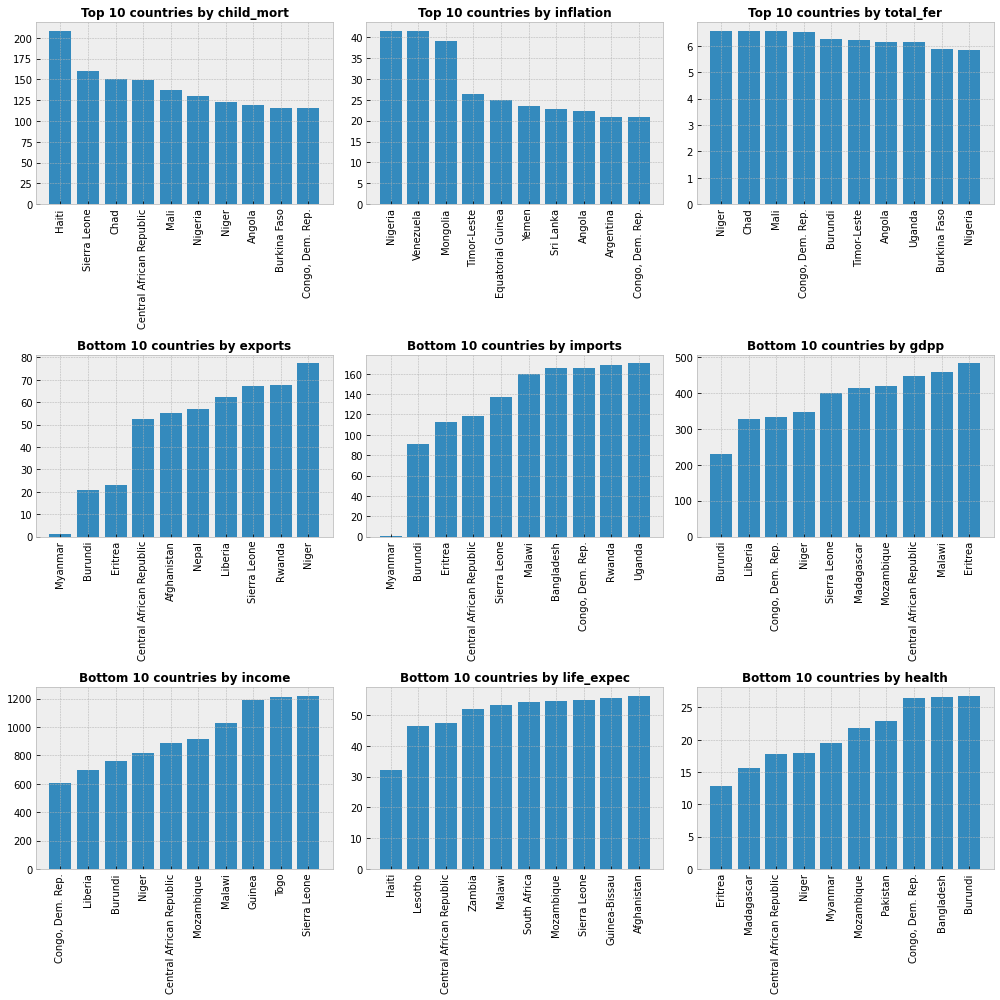

In [18]:
# We find the 10 countries which are the most backward for each of the given socio-economic and health factors
# We find the countries having the highest child mortality, inflation and total fertility 
# and those having the lowest values of exports, imports, income, life expectancy and health spending

plt.figure(figsize=(14,14))

plt.subplot(3,3,1)
find_top10("child_mort")

plt.subplot(3,3,2)
find_top10("inflation")

plt.subplot(3,3,3)
find_top10("total_fer")

plt.subplot(3,3,4)
find_bottom10("exports")

plt.subplot(3,3,5)
find_bottom10("imports")

plt.subplot(3,3,6)
find_bottom10("gdpp")

plt.subplot(3,3,7)
find_bottom10("income")

plt.subplot(3,3,8)
find_bottom10("life_expec")

plt.subplot(3,3,9)
find_bottom10("health")

plt.tight_layout()
plt.show();

## Bivariate Analysis

### Pair-wise relationship between the different parameters

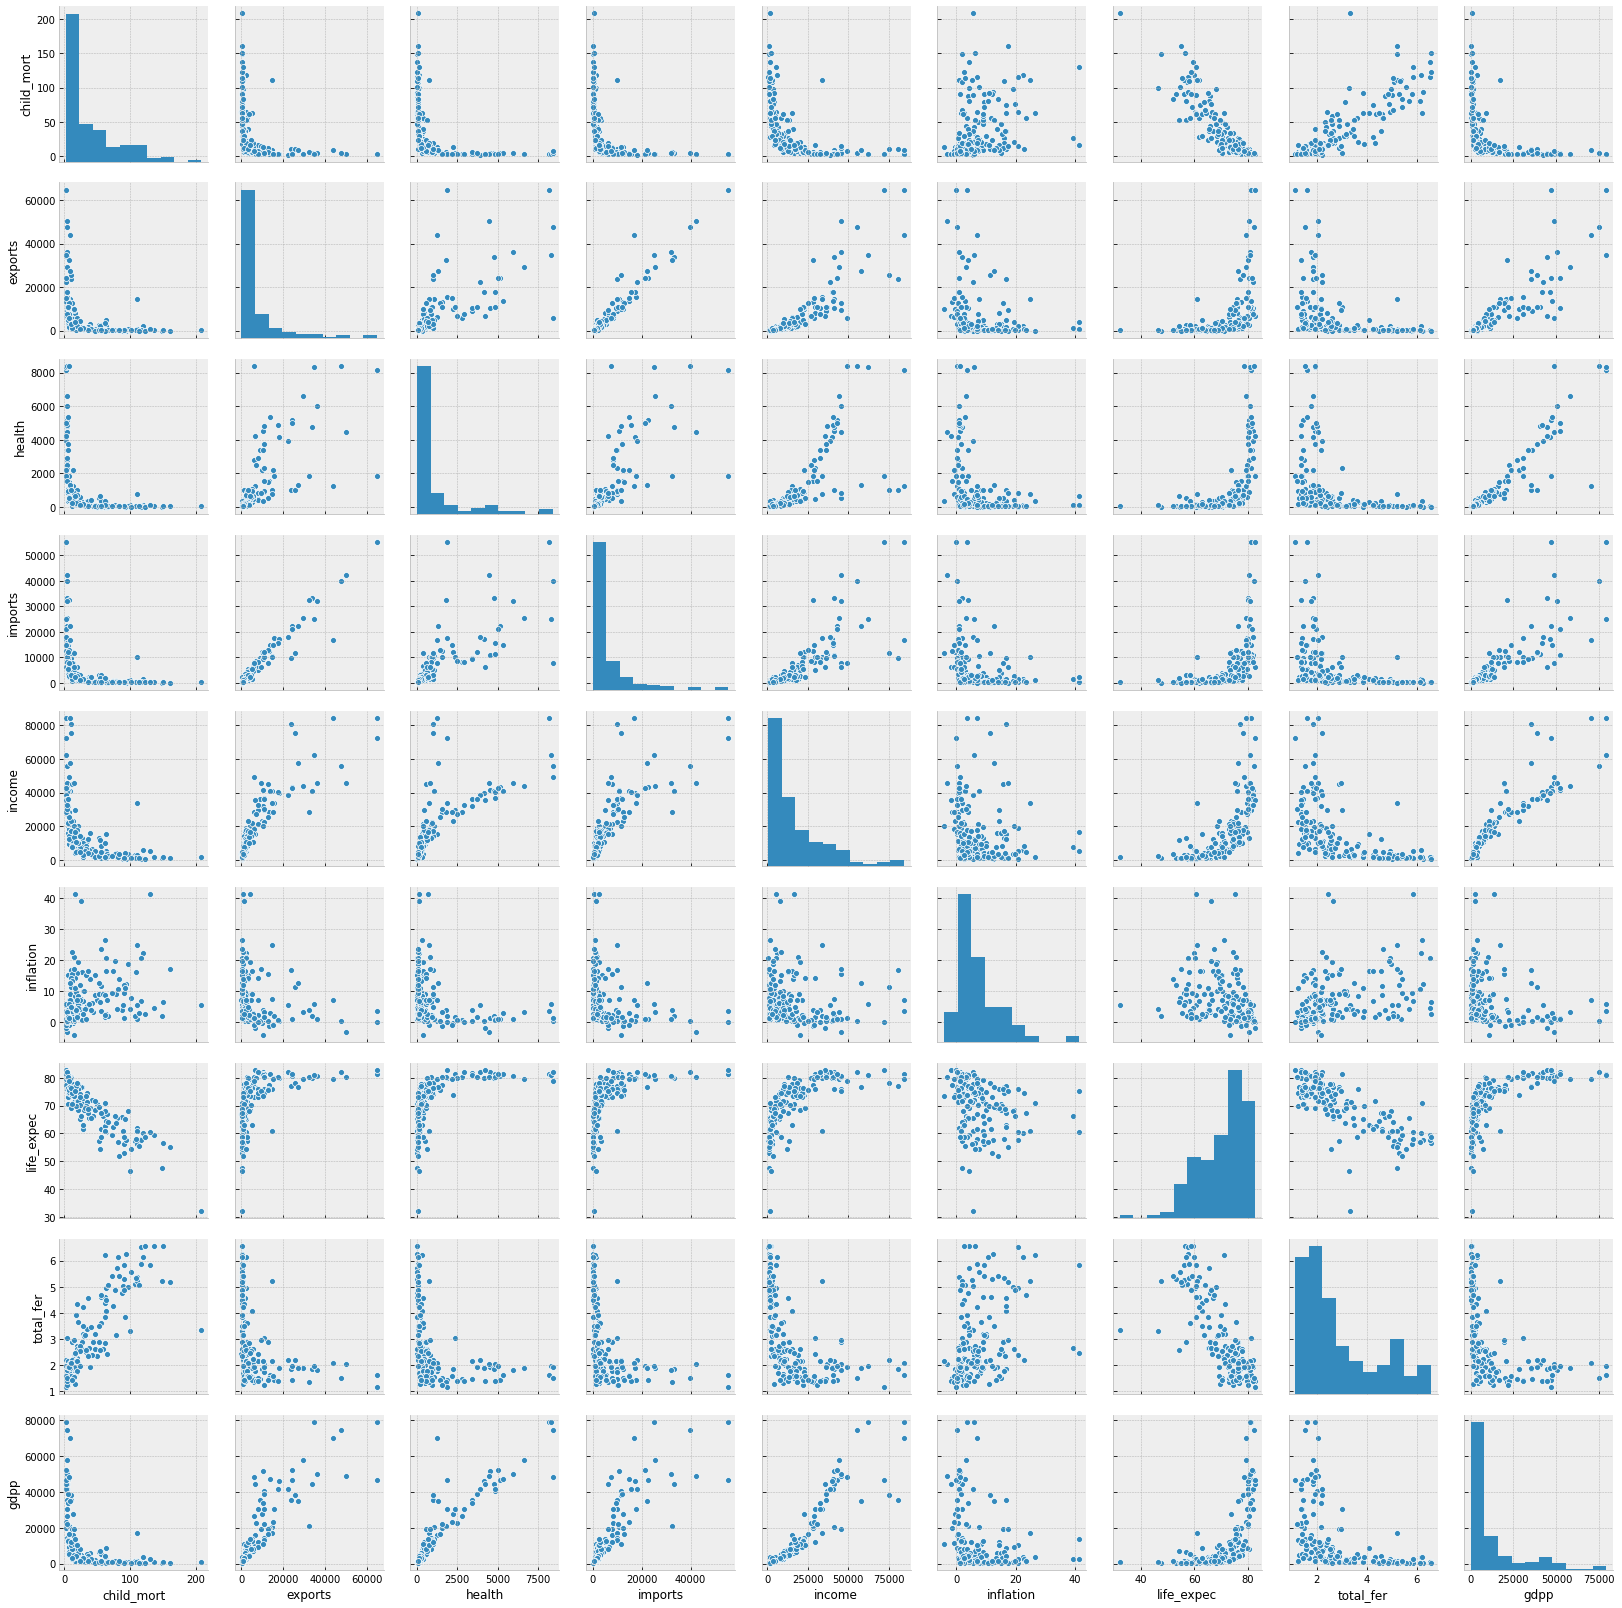

In [19]:
#plotting pairplot
sns.pairplot(df)
plt.show()

**Observations:**

The following pairs of variables are highly correlated:  
Gdpp and income  
Gdpp and exports  
Gdpp and imports  
Gdpp and health  
Total Fertility and life expectency  
Total Fertility and child mortality  
Life expectancy and child mortality  

### Bivariate analysis of binned categories

To perform bivariate analysis between different columns, we convert some of the columns to binned categories for our analysis purpose. We perform this analysis on a copy of the original dataframe, so as not to alter the original dataframe, which will be used for clustering purpose later.

In [20]:
#copy of dataframe for binning purpose
df_bin = df.copy()
df_bin.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


#### Convert columns income, life_expec and gdpp into binned categories

In [21]:
#bin the income column into 8 categories:0-1000, 1000-2000, 2000-5000, 5000-10000, 10000-20000, 20000-40000, 40000-80000,80000-125000 
#bin the life expectancy column into 6 categories: 30-40, 40-50, 50-60, 60-70, 70-80,80-90 
# bin the gdpp- GDP per capita column into 8 categories:0-500, 500-1000, 1000-2000, 2000-5000, 5000-10000, 10000-20000, 20000-40000, 40000-60000,60000-105000 

df_bin["income_bin"]=pd.cut(x=df_bin["income"],bins=[0,1000,2000,5000,10000,20000,40000,80000,125000],labels=['0-1000','1000-2000','2000-5000','5000-10000','10000-20000', '20000-40000','40000-80000','80000-125000'])
df_bin["life_expec_bin"]=pd.cut(x=df_bin["life_expec"],bins=[30,40,50,60,70,80,90],labels=['30-40','40-50','50-60','60-70','70-80', '80-90'])
df_bin["gdpp_bin"]=pd.cut(x=df_bin["gdpp"],bins=[0,500,1000,2000,5000,10000,20000,40000,60000,105000],labels=['0-500', '500-1000','1000-2000','2000-5000','5000-10000','10000-20000', '20000-40000','40000-60000','80000-105000'])

In [22]:
#checking the new dataframe after binning
df_bin.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_bin,life_expec_bin,gdpp_bin
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1000-2000,50-60,500-1000
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,5000-10000,70-80,2000-5000
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,10000-20000,70-80,2000-5000
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,5000-10000,60-70,2000-5000
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,10000-20000,70-80,10000-20000


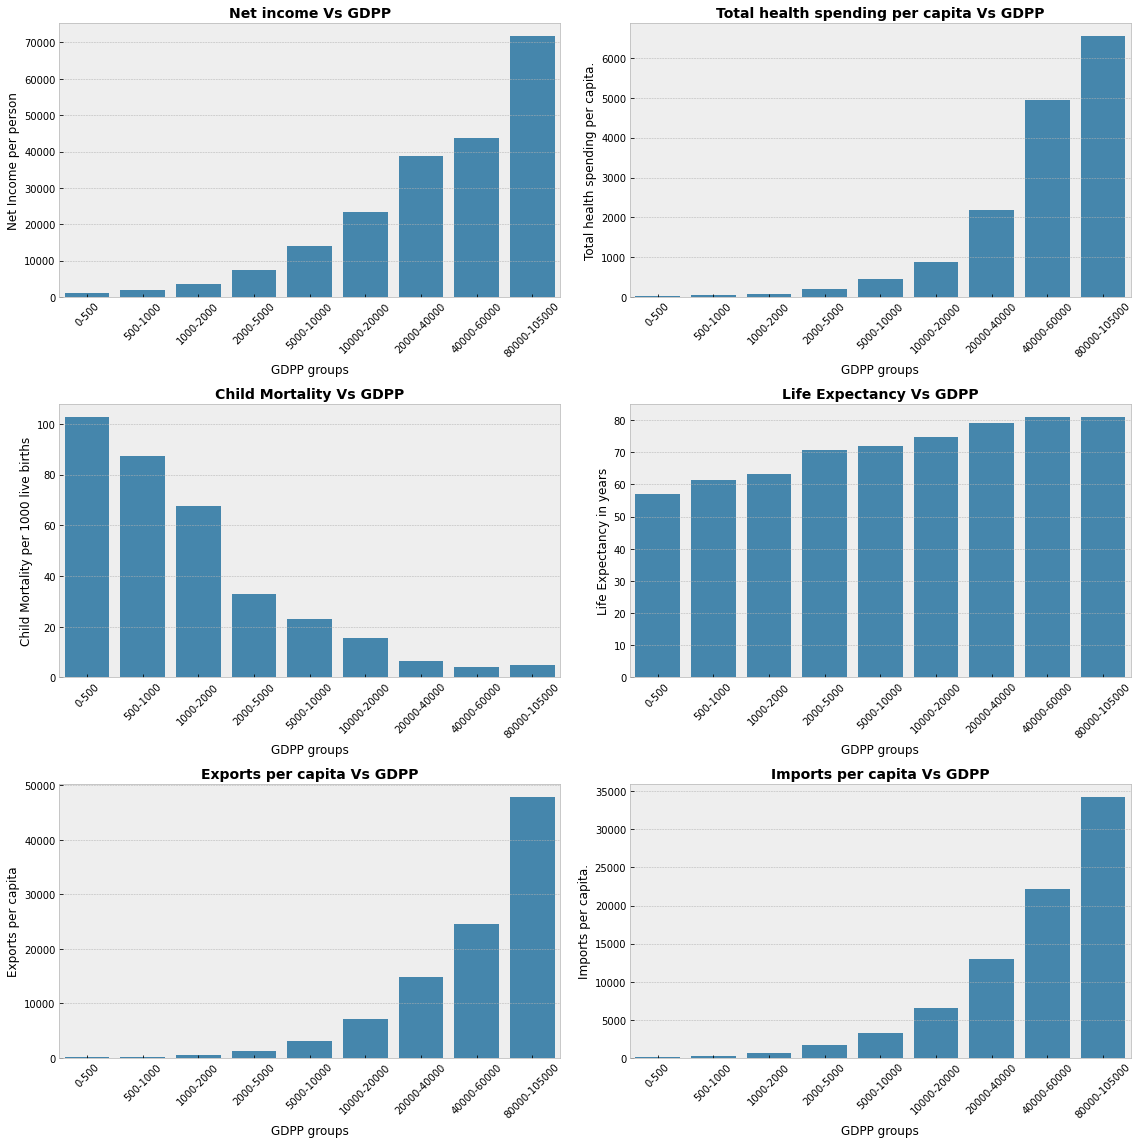

In [23]:
#Plotting gdpp Vs income, health, child_mort, life_expec

plt.figure(figsize=(16,16))

plt.subplot(3,2,1)
sns.barplot(df_bin["gdpp_bin"], df_bin["income"], color=sns.color_palette()[0], ci = None)
plt.xlabel("GDPP groups")
plt.ylabel('Net Income per person')
plt.title("Net income Vs GDPP",fontsize=14, fontweight="bold")
plt.xticks(rotation =45)

plt.subplot(3,2,2)
sns.barplot(df_bin["gdpp_bin"], df_bin["health"], color=sns.color_palette()[0], ci = None)
plt.xlabel("GDPP groups")
plt.ylabel('Total health spending per capita.')
plt.title("Total health spending per capita Vs GDPP",fontsize=14, fontweight="bold")
plt.xticks(rotation =45)

plt.subplot(3,2,3)
sns.barplot(df_bin["gdpp_bin"], df_bin["child_mort"], color=sns.color_palette()[0], ci = None)
plt.xlabel("GDPP groups")
plt.ylabel('Child Mortality per 1000 live births')
plt.title("Child Mortality Vs GDPP",fontsize=14, fontweight="bold")
plt.xticks(rotation =45)

plt.subplot(3,2,4)
sns.barplot(df_bin["gdpp_bin"], df_bin["life_expec"], color=sns.color_palette()[0], ci = None)
plt.xlabel("GDPP groups")
plt.ylabel('Life Expectancy in years')
plt.title("Life Expectancy Vs GDPP",fontsize=14, fontweight="bold")
plt.xticks(rotation =45)

plt.subplot(3,2,5)
sns.barplot(df_bin["gdpp_bin"], df_bin["exports"], color=sns.color_palette()[0], ci = None)
plt.xlabel("GDPP groups")
plt.ylabel('Exports per capita')
plt.title("Exports per capita Vs GDPP",fontsize=14, fontweight="bold")
plt.xticks(rotation =45)

plt.subplot(3,2,6)
sns.barplot(df_bin["gdpp_bin"], df_bin["imports"], color=sns.color_palette()[0], ci = None)
plt.xlabel("GDPP groups")
plt.ylabel('Imports per capita.')
plt.title("Imports per capita Vs GDPP",fontsize=14, fontweight="bold")
plt.xticks(rotation =45)

plt.tight_layout()
plt.show();

**Observations:**

1. The average net income per person is closely related with the GDPP. Lower the GDPP, lower is the net avaerage income, and higher for countries with higher GDPP.

1. The GDPP also influences the total health spending per capita, child mortality and life expectancy figures.Countries on the lower end of the GDPP spectrum spend less on health, and have high child mortality and low life expectancy. As GDPP increases, health spending increases, child mortality decreases and life expectancy increases.

1. The exports and imports varies with the GDPP. Countries with lowests GDPP have the lowest exports/imports, which increases as GDPP increases.

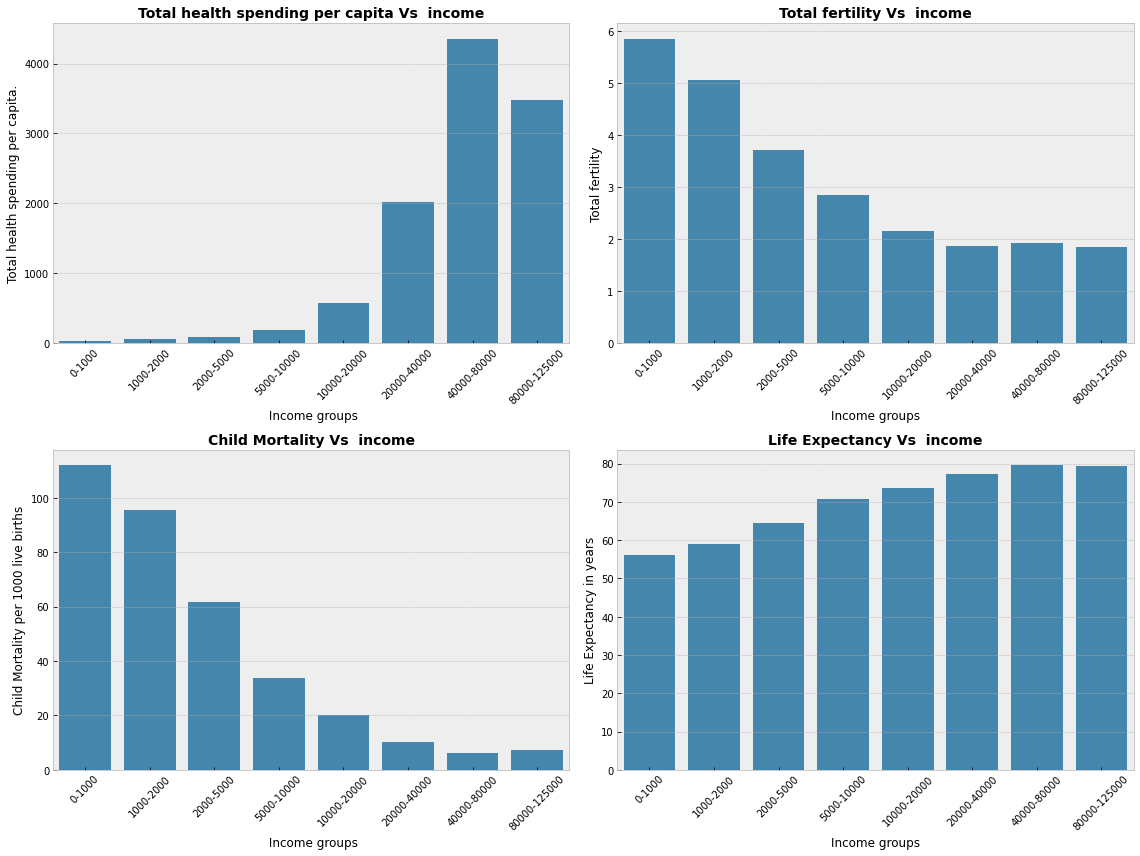

In [24]:
#Plotting Income groups Vs health, child_mort, life_expec

plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.barplot(df_bin["income_bin"], df_bin["health"], color=sns.color_palette()[0], ci = None)
plt.xlabel(" Income groups")
plt.ylabel('Total health spending per capita.')
plt.title("Total health spending per capita Vs  income",fontsize=14, fontweight="bold")
plt.xticks(rotation =45)

plt.subplot(2,2,2)
sns.barplot(df_bin["income_bin"], df_bin["total_fer"], color=sns.color_palette()[0], ci = None)
plt.xlabel("Income groups")
plt.ylabel('Total fertility')
plt.title("Total fertility Vs  income",fontsize=14, fontweight="bold")
plt.xticks(rotation =45)

plt.subplot(2,2,3)
sns.barplot(df_bin["income_bin"], df_bin["child_mort"], color=sns.color_palette()[0], ci = None)
plt.xlabel(" Income groups")
plt.ylabel('Child Mortality per 1000 live births')
plt.title("Child Mortality Vs  income",fontsize=14, fontweight="bold")
plt.xticks(rotation =45)

plt.subplot(2,2,4)
sns.barplot(df_bin["income_bin"], df_bin["life_expec"], color=sns.color_palette()[0], ci = None)
plt.xlabel("Income groups")
plt.ylabel('Life Expectancy in years')
plt.title("Life Expectancy Vs  income",fontsize=14, fontweight="bold")
plt.xticks(rotation =45)

plt.tight_layout()
plt.show();

**Observations:**

The total health spending per capita, child mortality, life expectancy and total fertility vary with the net per capita income.Countries having low average income spend less on health, and have high child mortality and fertility, and low life expectancy. As GDPP increases, health spending increases, child mortality decreases and life expectancy increases.

# Preparing the Data for modelling

## Scaling the variables- Standardisation

We bring the attributes to the same scale using standardization scaling.

In [25]:
#creating a new df with the required columns for scaling
df_to_scale = df.drop("country", axis=1)

# instantiate
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df_to_scale)
df_scaled.shape

(167, 9)

In [26]:
#checking the columns of the new dataframe
df_to_scale.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'], dtype='object')

In [27]:
#scaled dataframe
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.704258,-0.543736,-0.032042


## Calculation of Hopkins Statistics

**The Hopkins statistic is calculated to check if the data indicates cluster tendency, in other words: how well the data can be clustered. It is important to check the suitability of the data for clustering before we proceed for clustering.**

In [28]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

In [29]:
# We calculate the Hopkins score 10 times (as it may vary each time) and then check the average score

scores = []
for i in range(1,20):
    scores.append(hopkins(df_scaled))

print(np.mean(scores))

0.8850170796299884


**Observation:**

From the value of  Hopkins statistic obtained more than 80%, it can be concluded that the data has a high tendency to cluster, and we can proceed for clustering.

# Modelling the data

## Finding the Optimal Number of Clusters

### SSD/ elbow curve method 

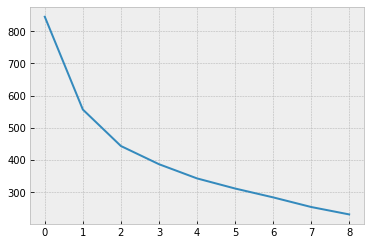

In [30]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Silhouette Analysis

In [31]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.46945658285687586
For n_clusters=3, the silhouette score is 0.4035259981391569
For n_clusters=4, the silhouette score is 0.3919682996098615
For n_clusters=5, the silhouette score is 0.38416316490898117
For n_clusters=6, the silhouette score is 0.2978596841053895
For n_clusters=7, the silhouette score is 0.308111358466568
For n_clusters=8, the silhouette score is 0.32168865107660854
For n_clusters=9, the silhouette score is 0.30062599456936473
For n_clusters=10, the silhouette score is 0.30239159378613634


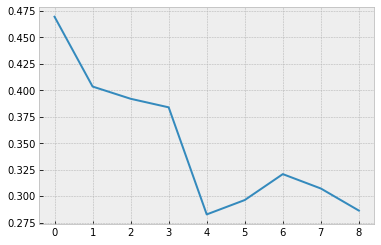

In [32]:
# silhoutte analysis
ss = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_scaled)
    ss.append([silhouette_score(df_scaled, kmeans.labels_)])
    
# plot the SSDs for each n_clusters
# ssd
ss_df = pd.DataFrame(ss)
plt.plot(ss)

**Observation:**

**From the elbow-curve method, we observe the first elbow forming at k=3**

**The highest silhoutte score is observed at k=2. However, as it would not make logical or business sense to have only two clusters of countries, therefore we choose the next higher value, that is, k=3, which would be suitable logically and from our problem perspective.**

**Therfore, we choose the number of clusters as 3, from the above elbow-curve and Silhoutte scores.**

## K-Means Clustering

In [33]:
# k-means model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=100)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [34]:
#checking cluster labels
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [35]:
#we make a copy of the original dataframe for performing our clustering
df_clusters = df.copy()
df_clusters.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [36]:
# assign the k-means cluster labels
df_clusters['cluster_id_km'] = kmeans.labels_
df_clusters.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_km
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [37]:
#checking the number of countries in each of the clusters formed by K-means

kmcluster_nos = pd.DataFrame(df_clusters["cluster_id_km"].value_counts())
kmcluster_nos.columns = ["No. of Countries"]
kmcluster_nos.index.name = "Cluster no"
kmcluster_nos.sort_index()

,No. of Countries
Cluster no,
0,48
1,29
2,90


### Cluster Profiling of K-means clusters

**We analyse the k-means clusters by comparing how the three variables - gdpp, child_mort and income, vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.**

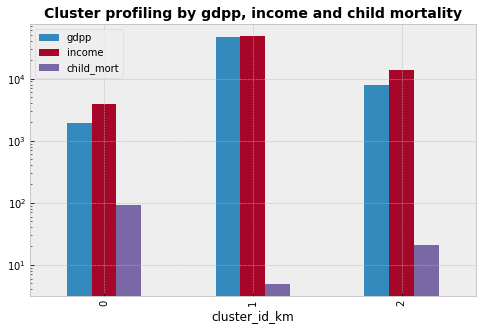

In [38]:
# analysis of gdpp, income and child mortality for the different clusters

df_clusters[['gdpp','income', 'child_mort','cluster_id_km']].groupby('cluster_id_km').mean().plot(kind = 'bar', figsize = (8,5))
plt.title("Cluster profiling by gdpp, income and child mortality", fontsize=14, fontweight="bold")
plt.yscale('log') 
plt.show();

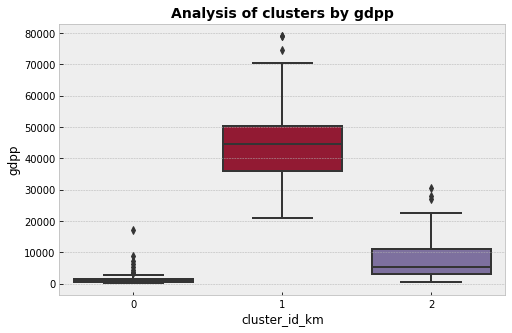

In [39]:
# Analysis of clusters w.r.t gdpp
plt.figure(figsize = (8,5))
sns.boxplot(x='cluster_id_km', y='gdpp', data=df_clusters)
plt.title("Analysis of clusters by gdpp", fontsize=14, fontweight="bold")
plt.show();

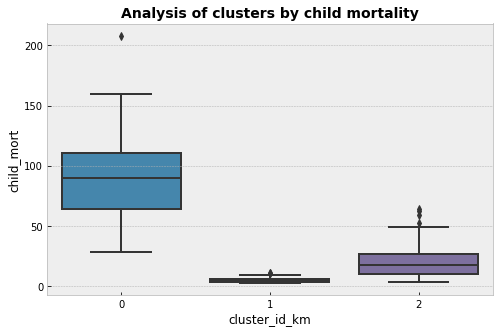

In [40]:
# Analysis of clusters w.r.t child mortality
plt.figure(figsize = (8,5))
plt.title("Analysis of clusters by child mortality", fontsize=14, fontweight="bold")
sns.boxplot(x='cluster_id_km', y='child_mort', data=df_clusters)
plt.show;

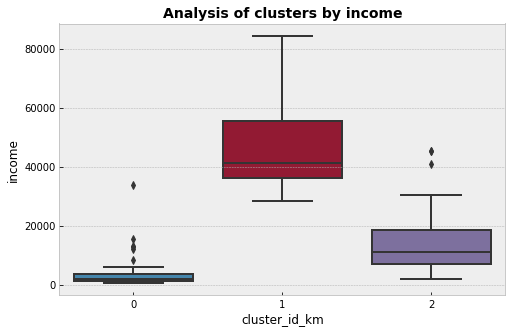

In [41]:
# Analysis of clusters w.r.t income
plt.figure(figsize = (8,5))
sns.boxplot(x='cluster_id_km', y='income', data=df_clusters)
plt.title("Analysis of clusters by income", fontsize=14, fontweight="bold")
plt.show()

**Observations:**

By analysing how the three variables - gdpp, child_mort and income, vary for each cluster of countries, we observe that:

1. **Cluster 0** countries have lowest values of gdpp and net income, and the highest child mortality figures. These would be the underdeveloped countries.

2. **Cluster 1** countries have the highest average gdpp and income, and the lowest child mortality. These would be the developed countries.

3. **Cluster 2** countries have moderate average gdpp and income, and child mortality figures lie between cluster 0 and 1 figures. These would be the developing countries.

**Hence we will focus our attention on the countries in Cluster 0 which are the underdeveloped countries, and are performing the worst in the socio-economic and health factors that determine the overall development of the country.**

In [42]:
#list of all countries in cluster id 0 chosen as our target cluster

df_clusters[df_clusters["cluster_id_km"] ==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_km
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.8200,553.0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.3600,758.0,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.8800,6350.0,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.1100,1310.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.7500,769.0,0


In [43]:
#list of 10 countries from cluster 0 with the lowest gdpp, lowest income and highest child mortality

kmeans_top10 = df_clusters[df_clusters["cluster_id_km"] ==0].sort_values(by=['gdpp','income','child_mort'], ascending = [True, True, False]).head(10)
kmeans_top10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_km
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459.0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482.0,0


**Observations:**


**From the above analysis using K-means clustering, the countries chosen from the above list which are in the direst need of aid are as follows:**



1. Burundi
1. Liberia
1. Congo, Dem. Rep
1. Niger
1. Sierra Leone
1. Madagascar
1. Mozambique
1. Central African Republic	
1. Malawi
1. Eritrea



### Cluster Visualizations for K-means clusters

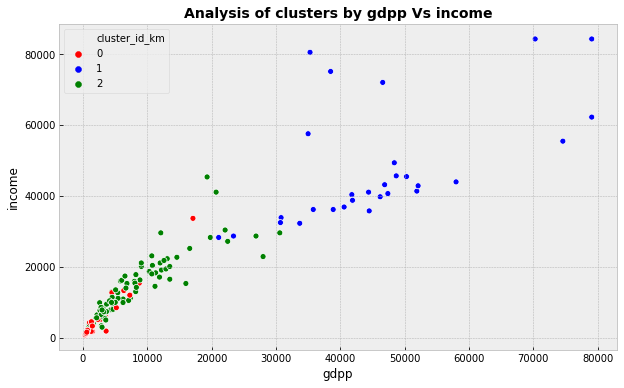

In [44]:
#scatterplot of gdpp vs income
plt.figure(figsize = (10,6))
sns.scatterplot(x='gdpp',y='income',hue='cluster_id_km', data = df_clusters, palette=['red','blue','green'])
plt.title("Analysis of clusters by gdpp Vs income", fontsize=14, fontweight="bold")
plt.show()

**Observation:**

The GDPP and net income of countries are directly proportional to each other. Higher the GDPP, higher is the net income of that country, and vice-versa.

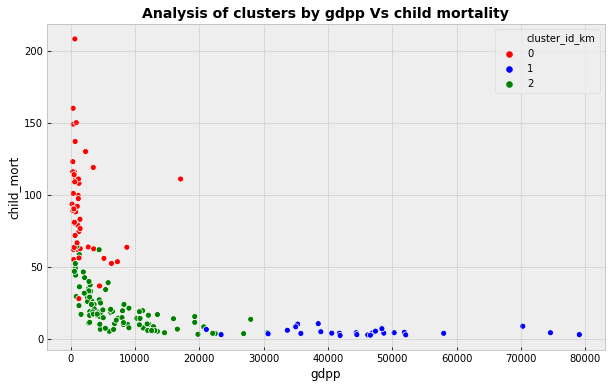

In [45]:
#scatterplot of gdpp vs child mortality
plt.figure(figsize = (10,6))
sns.scatterplot(x='gdpp',y='child_mort',hue='cluster_id_km', data = df_clusters, palette=['red','blue','green'])
plt.title("Analysis of clusters by gdpp Vs child mortality", fontsize=14, fontweight="bold")
plt.show()

**Observation:**
    
The GDPP and child mortality of countries are inversely proportional to each other. Higher the GDPP, lower is the child mortality, and vice-versa.  
Cluster 0 countries have low GDPP, high child mortality.  
Cluster 2 countries have low-medium GDPP, lower child mortality.  
Cluster 1 countries have high GDPP, low child mortality.

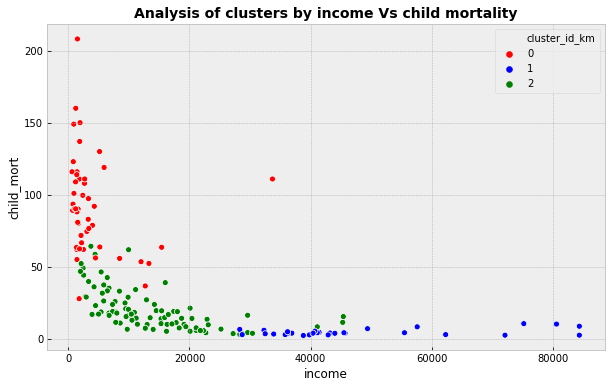

In [46]:
#scatterplot of income vs child mortality
plt.figure(figsize = (10,6))
sns.scatterplot(x='income',y='child_mort',hue='cluster_id_km', data = df_clusters, palette=['red','blue','green'])
plt.title("Analysis of clusters by income Vs child mortality", fontsize=14, fontweight="bold")
plt.show()

**Observation:**

The net income and child mortality of countries are inversely proportional to each other. Higher the income, lower is the child mortality, and vice-versa.  
Cluster 0 countries have low income, high child mortality.  
Cluster 2 countries have low-medium income, lower child mortality.  
Cluster 1 countries have high income, low child mortality.

## Hierarchical Clustering

In [47]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.704258,-0.543736,-0.032042


In [48]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


### Hierarchical clustering with single linkage

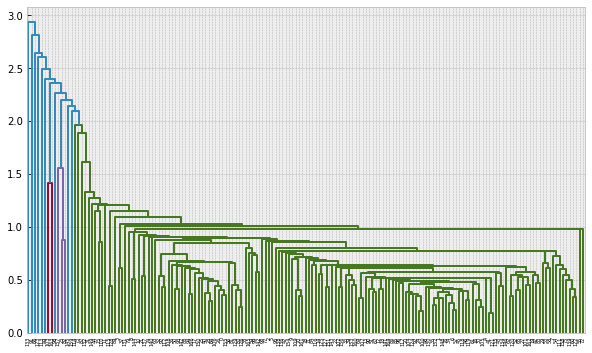

In [49]:
# single linkage dendrogram
plt.figure(figsize = (10,6))
mergings_single = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

### Hierarchical clustering with complete linkage

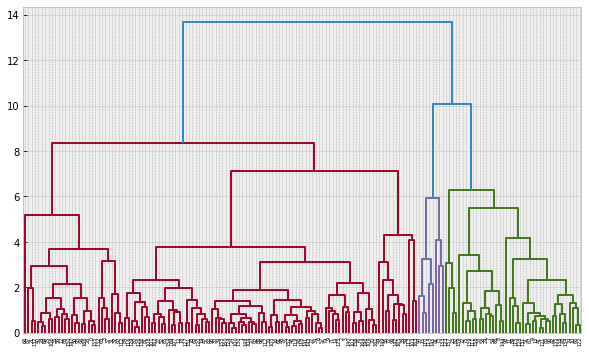

In [50]:
# complete linkage dendrogram
plt.figure(figsize = (10,6))
mergings_complete = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

**It is difficult to interpret the single-linkage dendrogram, so we choose to cluster based on complete_linkage method, where we see that the clusters are distinctly defined.**

**We cut the dendrogram at the point 9 on the y-axis, such that the number of clusters obtained is 3, and we proceed with this value for hierarchical clustering.**

In [51]:
# checking cluster labels 
cluster_labels = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [52]:
# assign the hierarchical cluster labels
df_clusters['cluster_id_hier'] = cluster_labels
df_clusters.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_km,cluster_id_hier
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,1


In [53]:
#checking the number of countries in each of the clusters formed by hierarchical clustering

hcluster_nos = pd.DataFrame(df_clusters["cluster_id_hier"].value_counts())
hcluster_nos.columns = ["No. of Countries"]
hcluster_nos.index.name = "Cluster no"
hcluster_nos.sort_index()

,No. of Countries
Cluster no,
0,118
1,41
2,8


### Cluster Profiling of hierarchical clusters

**We analyse the hierarchical clusters by comparing how the three variables - gdpp, child_mort and income, vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.**

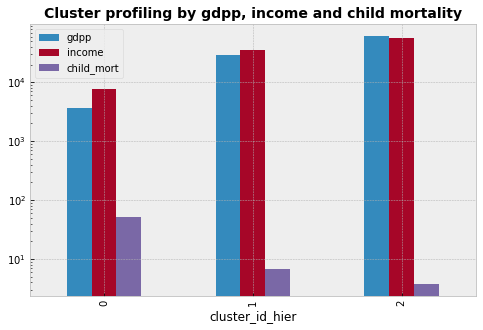

In [54]:
# analysis of gdpp, income and child mortality for the different clusters
df_clusters[['gdpp','income', 'child_mort','cluster_id_hier']].groupby('cluster_id_hier').mean().plot(kind = 'bar', figsize = (8,5))
plt.title("Cluster profiling by gdpp, income and child mortality", fontsize=14, fontweight="bold")
plt.yscale('log') 
plt.show();

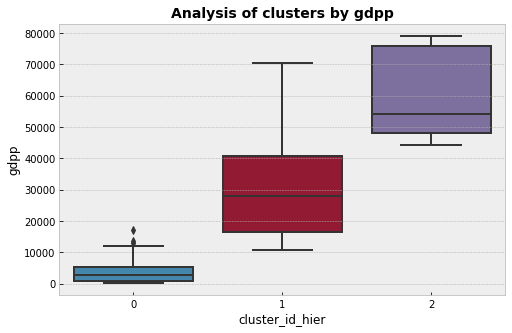

In [55]:
# Analysis of clusters w.r.t gdpp
plt.figure(figsize = (8,5))
sns.boxplot(x='cluster_id_hier', y='gdpp', data=df_clusters)
plt.title("Analysis of clusters by gdpp", fontsize=14, fontweight="bold")
plt.show();

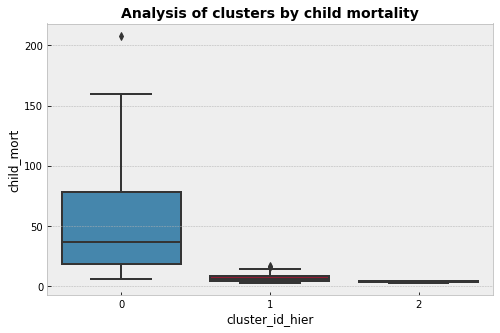

In [56]:
# Analysis of clusters w.r.t child mortality
plt.figure(figsize = (8,5))
plt.title("Analysis of clusters by child mortality", fontsize=14, fontweight="bold")
sns.boxplot(x='cluster_id_hier', y='child_mort', data=df_clusters)
plt.show;

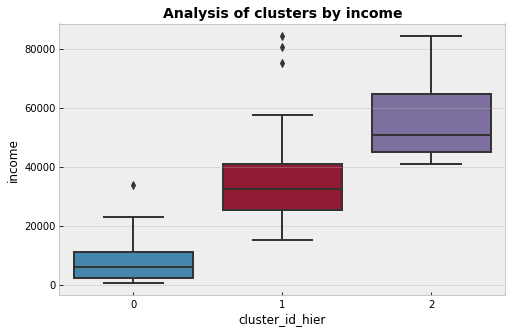

In [57]:
# Analysis of clusters w.r.t income
plt.figure(figsize = (8,5))
sns.boxplot(x='cluster_id_hier', y='income', data=df_clusters)
plt.title("Analysis of clusters by income", fontsize=14, fontweight="bold")
plt.show()

**Observations:**

By analysing how the three variables - gdpp, child_mort and income, vary for each cluster of countries, we observe that:

1. **Cluster 0** countries have lowest values of gdpp and net income, and the highest child mortality figures. These would be the underdeveloped countries which needs aid.

2. **Cluster 2** countries have the highest average gdpp and income, and the lowest child mortality. These would be the developed countries.

3. **Cluster 1** countries have moderate average gdpp and income, and child mortality figures lie between cluster 0 and 1 figures. These would be the developing countries.

In [58]:
#list of all countries in cluster id 0 chosen as our target cluster

df_clusters[df_clusters["cluster_id_hier"] ==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_km,cluster_id_hier
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610.0,9.440,56.2,5.8200,553.0,0,0
1,Albania,16.6,1145.20000,267.8950,1987.740000,9930.0,4.490,76.3,1.6500,4090.0,2,0
2,Algeria,27.3,1712.64000,185.9820,1400.440000,12900.0,16.100,76.5,2.8900,4460.0,2,0
3,Angola,119.0,2199.19000,100.6050,1514.370000,5900.0,22.400,60.1,6.1600,3530.0,0,0
5,Argentina,14.5,1946.70000,834.3000,1648.000000,18700.0,20.900,75.8,2.3700,10300.0,2,0
6,Armenia,18.1,669.76000,141.6800,1458.660000,6700.0,7.770,73.3,1.6900,3220.0,2,0
9,Azerbaijan,39.2,3171.12000,343.3920,1208.880000,16000.0,13.800,69.1,1.9200,5840.0,2,0
12,Bangladesh,49.4,121.28000,26.6816,165.244000,2440.0,7.140,70.4,2.3300,758.0,2,0
14,Belarus,5.5,3099.42000,338.2830,3889.350000,16200.0,15.100,70.4,1.4900,6030.0,2,0
16,Belize,18.8,2525.88000,225.6800,2495.500000,7880.0,1.140,71.4,2.7100,4340.0,2,0


In [59]:
#list of 10 countries from cluster 0 with the lowest gdpp, income and highest child mortality

hier_top10 = df_clusters[df_clusters["cluster_id_hier"] ==0].sort_values(by=['gdpp','income','child_mort'], ascending = [True, True, False]).head(10)
hier_top10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_km,cluster_id_hier
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413.0,0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459.0,0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482.0,0,0


In [60]:
# above list of 10 countries with the lowest_gdpp,lowest_income, highest child_mort columns only
hier_top10[['country','gdpp','income','child_mort']]

,country,gdpp,income,child_mort
26,Burundi,231.0,764.0,93.6
88,Liberia,327.0,700.0,89.3
37,"Congo, Dem. Rep.",334.0,609.0,116.0
112,Niger,348.0,814.0,123.0
132,Sierra Leone,399.0,1220.0,160.0
93,Madagascar,413.0,1390.0,62.2
106,Mozambique,419.0,918.0,101.0
31,Central African Republic,446.0,888.0,149.0
94,Malawi,459.0,1030.0,90.5
50,Eritrea,482.0,1420.0,55.2


**Observations:**

**Countries chosen for aid from the above list of countries as per hierarchical clustering are:**


1. Burundi
1. Liberia
1. Congo, Dem. Rep
1. Niger
1. Sierra Leone
1. Madagascar
1. Mozambique
1. Central African Republic	
1. Malawi
1. Eritrea


### Cluster Visualizations for Hierarchical clusters

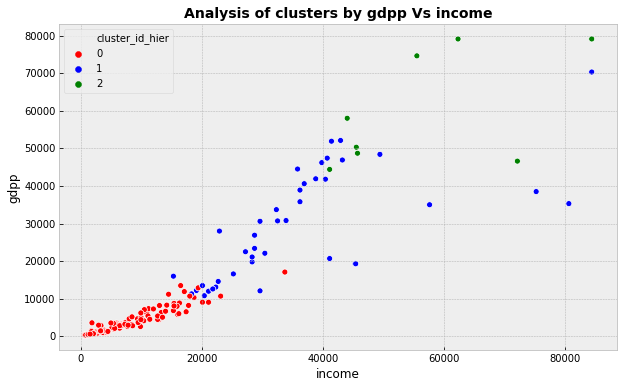

In [61]:
#scatterplot of income vs gdpp
plt.figure(figsize = (10,6))
sns.scatterplot(x='income',y='gdpp',hue='cluster_id_hier', data = df_clusters, palette=['red','blue','green'])
plt.title("Analysis of clusters by gdpp Vs income", fontsize=14, fontweight="bold")
plt.show()

**Observation:**

The GDPP and net income of countries are directly proportional to each other. Higher the GDPP, higher is the net income of that country, and vice-versa.

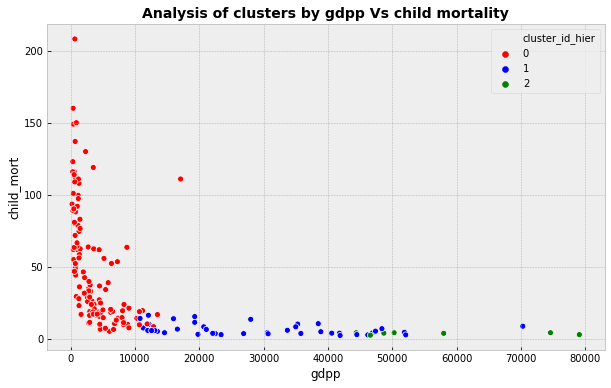

In [62]:
#scatterplot of gdpp vs child mortality
plt.figure(figsize = (10,6))
sns.scatterplot(x='gdpp',y='child_mort',hue='cluster_id_hier', data = df_clusters, palette=['red','blue','green'])
plt.title("Analysis of clusters by gdpp Vs child mortality", fontsize=14, fontweight="bold")
plt.show()

**Observation:**
    
The GDPP and child mortality of countries are inversely proportional to each other. Higher the GDPP, lower is the child mortality, and vice-versa.  
Cluster 0 countries have low GDPP, high child mortality.  
Cluster 2 countries have low-medium GDPP, lower child mortality.  
Cluster 1 countries have high GDPP, low child mortality.

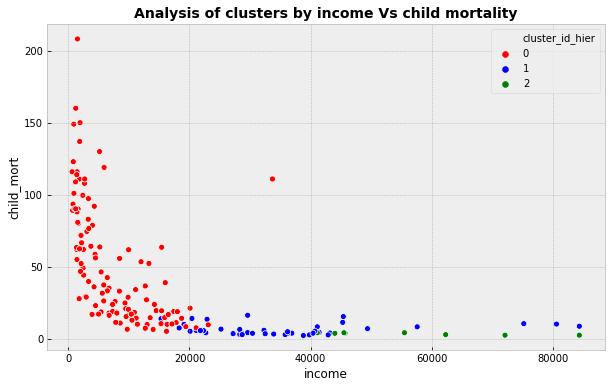

In [63]:
#scatterplot of income vs child mortality
plt.figure(figsize = (10,6))
sns.scatterplot(x='income',y='child_mort',hue='cluster_id_hier', data = df_clusters, palette=['red','blue','green'])
plt.title("Analysis of clusters by income Vs child mortality", fontsize=14, fontweight="bold")
plt.show()

**Observation:**
    
The income and child mortality of countries are inversely proportional to each other. Higher the income, lower is the child mortality, and vice-versa.  
Cluster 0 countries have low income, high child mortality.  
Cluster 2 countries have low-medium income, lower child mortality.  
Cluster 1 countries have high income, low child mortality.

# Final analysis and Recommendations

Thus we have used both K-Means and Hierarchical clustering to categorise the countries using some socio-economic and health factors, and identified the countries which are in dire need of aid. We have obtained the same set of countries using both the K-Means and Hierarchical clustering methods, which rank lowest in terms of gdpp and income and highest in child mortality. The list of countries which can be suggested as the ones which on the organization needs to focus on the most for providing funding are:


1. Burundi
1. Liberia
1. Congo, Dem. Rep
1. Niger
1. Sierra Leone
1. Madagascar
1. Mozambique
1. Central African Republic	
1. Malawi
1. Eritrea